In [90]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

csv_path = os.getenv("HOME") +"/data/data/bike-sharing-demand/train.csv"
original_data = pd.read_csv(csv_path)

In [79]:
df=original_data
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [80]:
df['datetime']=pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['minute']=df['datetime'].dt.minute
df['second']=df['datetime'].dt.second


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


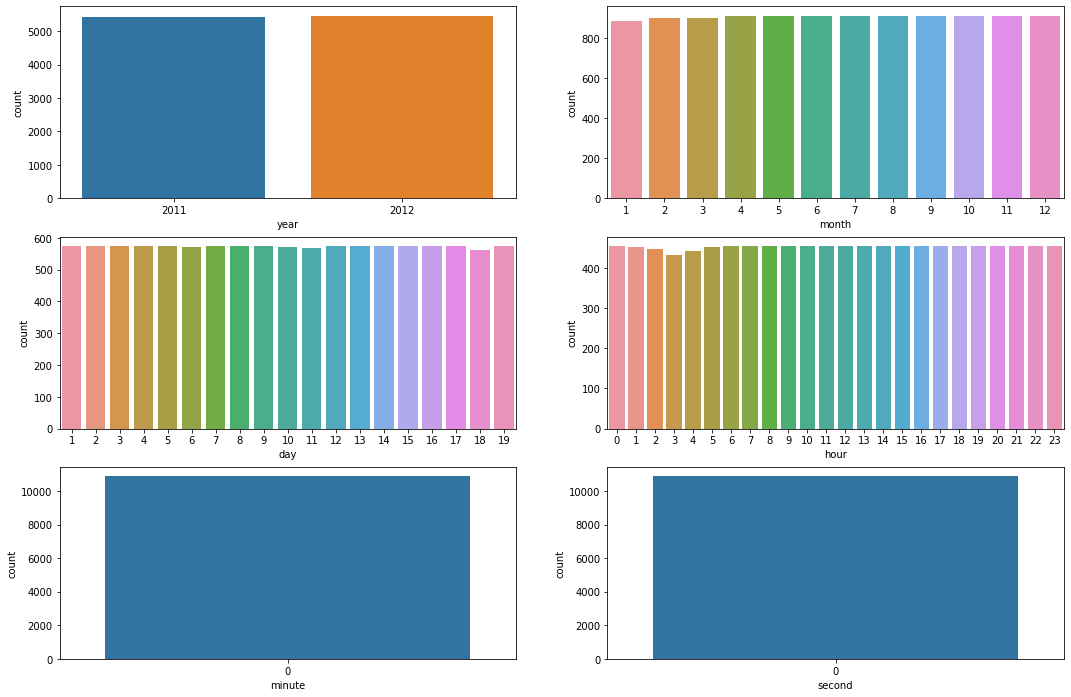

In [81]:
fig, ax = plt.subplots(3,2, figsize=(18,12))
sns.countplot(x=df['year'], ax=ax[0,0])
sns.countplot(x=df['month'], ax=ax[0,1])
sns.countplot(x=df['day'], ax=ax[1,0])
sns.countplot(x=df['hour'], ax=ax[1,1])
sns.countplot(x=df['minute'], ax=ax[2,0])
sns.countplot(x=df['second'], ax=ax[2,1])
fig.show()

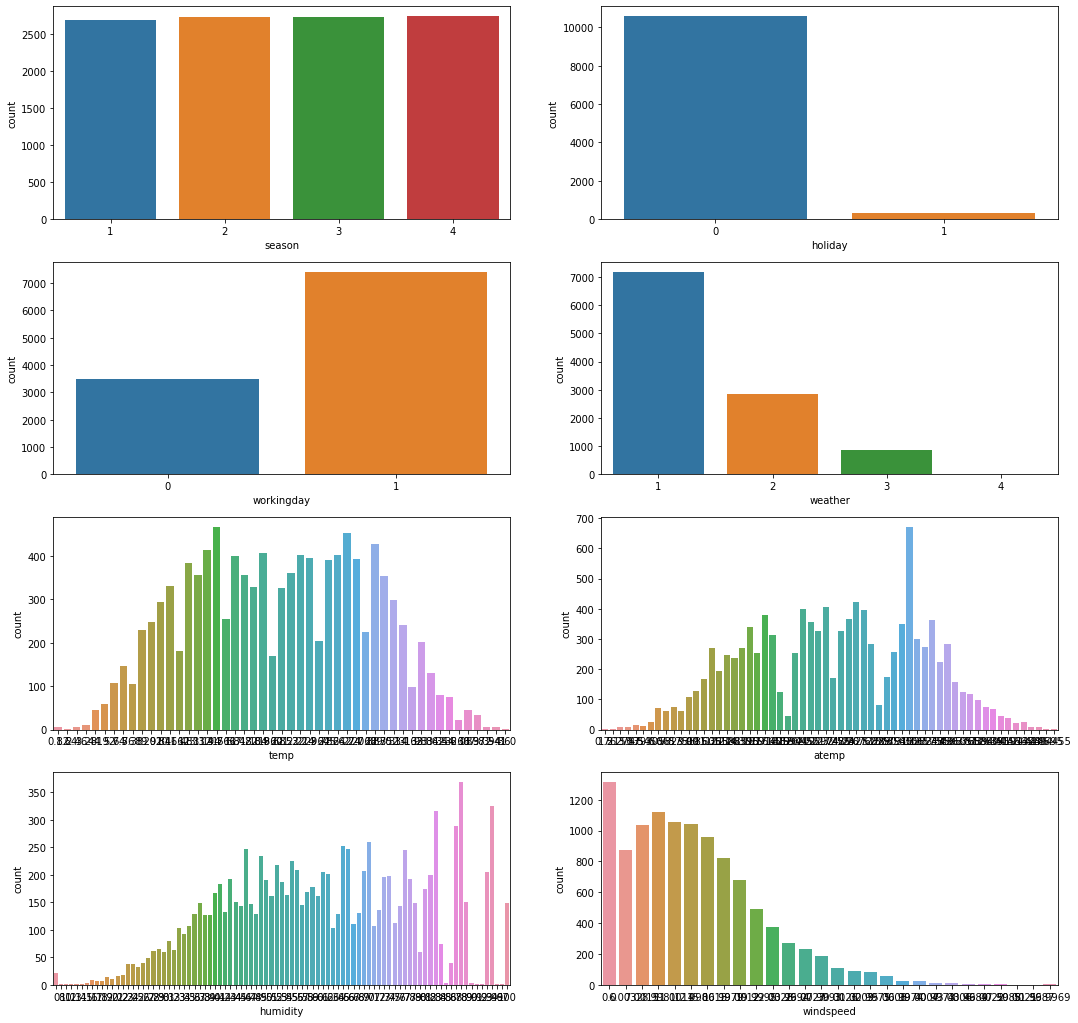

In [165]:
fig, ax = plt.subplots(4,2, figsize=(18,18))
sns.countplot(x=df['season'], ax=ax[0,0])
sns.countplot(x=df['holiday'], ax=ax[0,1])
sns.countplot(x=df['workingday'], ax=ax[1,0])
sns.countplot(x=df['weather'], ax=ax[1,1])
sns.countplot(x=df['temp'], ax=ax[2,0])
sns.countplot(x=df['atemp'], ax=ax[2,1])
sns.countplot(x=df['humidity'], ax=ax[3,0])
sns.countplot(x=df['windspeed'], ax=ax[3,1])
fig.show()

In [301]:
X=df[['season','temp','atemp','humidity','windspeed','year','month','day','hour']].values
y=df['count']
print(X.shape)
print(y.shape)

(10886, 9)
(10886,)


In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=777) 

In [303]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(8708, 9) (8708,)
(2178, 9) (2178,)


In [304]:
model = LinearRegression()

In [305]:
model.fit(X_train,y_train)

LinearRegression()

In [306]:
predictions = model.predict(X_test)
predictions

array([111.72135956, 168.24817728, 245.58464447, ..., 369.64166112,
       134.37027985, 172.33922283])

In [307]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

20789.60977006346

In [309]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
rmse=mean_squared_error(y_test, predictions, squared=False) 
rmse

144.18602487780657

X에 어떤 값을 넣어야 원하는 값이 나올까 싶어 일단 영향을 줄만한 것들을 시각화 해보았다.   
temp, atemp, humidity, windspeed 정도가 영향이 있을 것 같아서 넣고 해봐도 조금 모잘랐었는데,   
위에 만들어 두었던 연도, 월, 일, 시간 컬럼을 대입해 보았다.  
그리고 실행해보니 괜찮은 결과가 나왔다.   
오늘 코딩 하면서 든 생각은, 명명을 할 때 알아볼 수 있게 명명을 해야하겠다는 생각이 들었다.   
아니면 다른 곳에 무슨 의미를 가지고 있는지 적어 놓을 필요가 있어 보인다.   

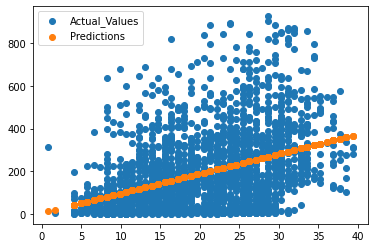

In [325]:
X=df[['temp']].values
y=df['count']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=777) 

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
plt.scatter(X_test[:, 0], y_test, label="Actual_Values")
plt.scatter(X_test[:, 0], predictions, label="Predictions") #산점도 방식으로 표현
plt.legend()
plt.show()

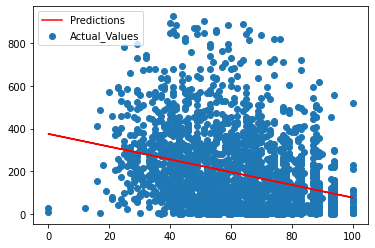

In [322]:
X=df[['humidity']].values
y=df['count']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=777) 
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
plt.scatter(X_test[:, 0], y_test, label="Actual_Values")
plt.plot(X_test[:, 0], predictions, color='red' , label="Predictions") #선그래프 방식으로 표현, 색깔이 겹쳐서 color = red로 지정.
plt.legend()
plt.show()